In [1]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [7]:
import pandas as pd
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Tasks:

1. Analyse the data using the visualizations

2. Preprocess the data by handling missing values & Outliers, if any.

3. Split the dataset into training and testing sets (80% training, 20% testing).

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

5. Choose an appropriate distance metric and value for K.

6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

7. Visualize the decision boundaries of the classifier


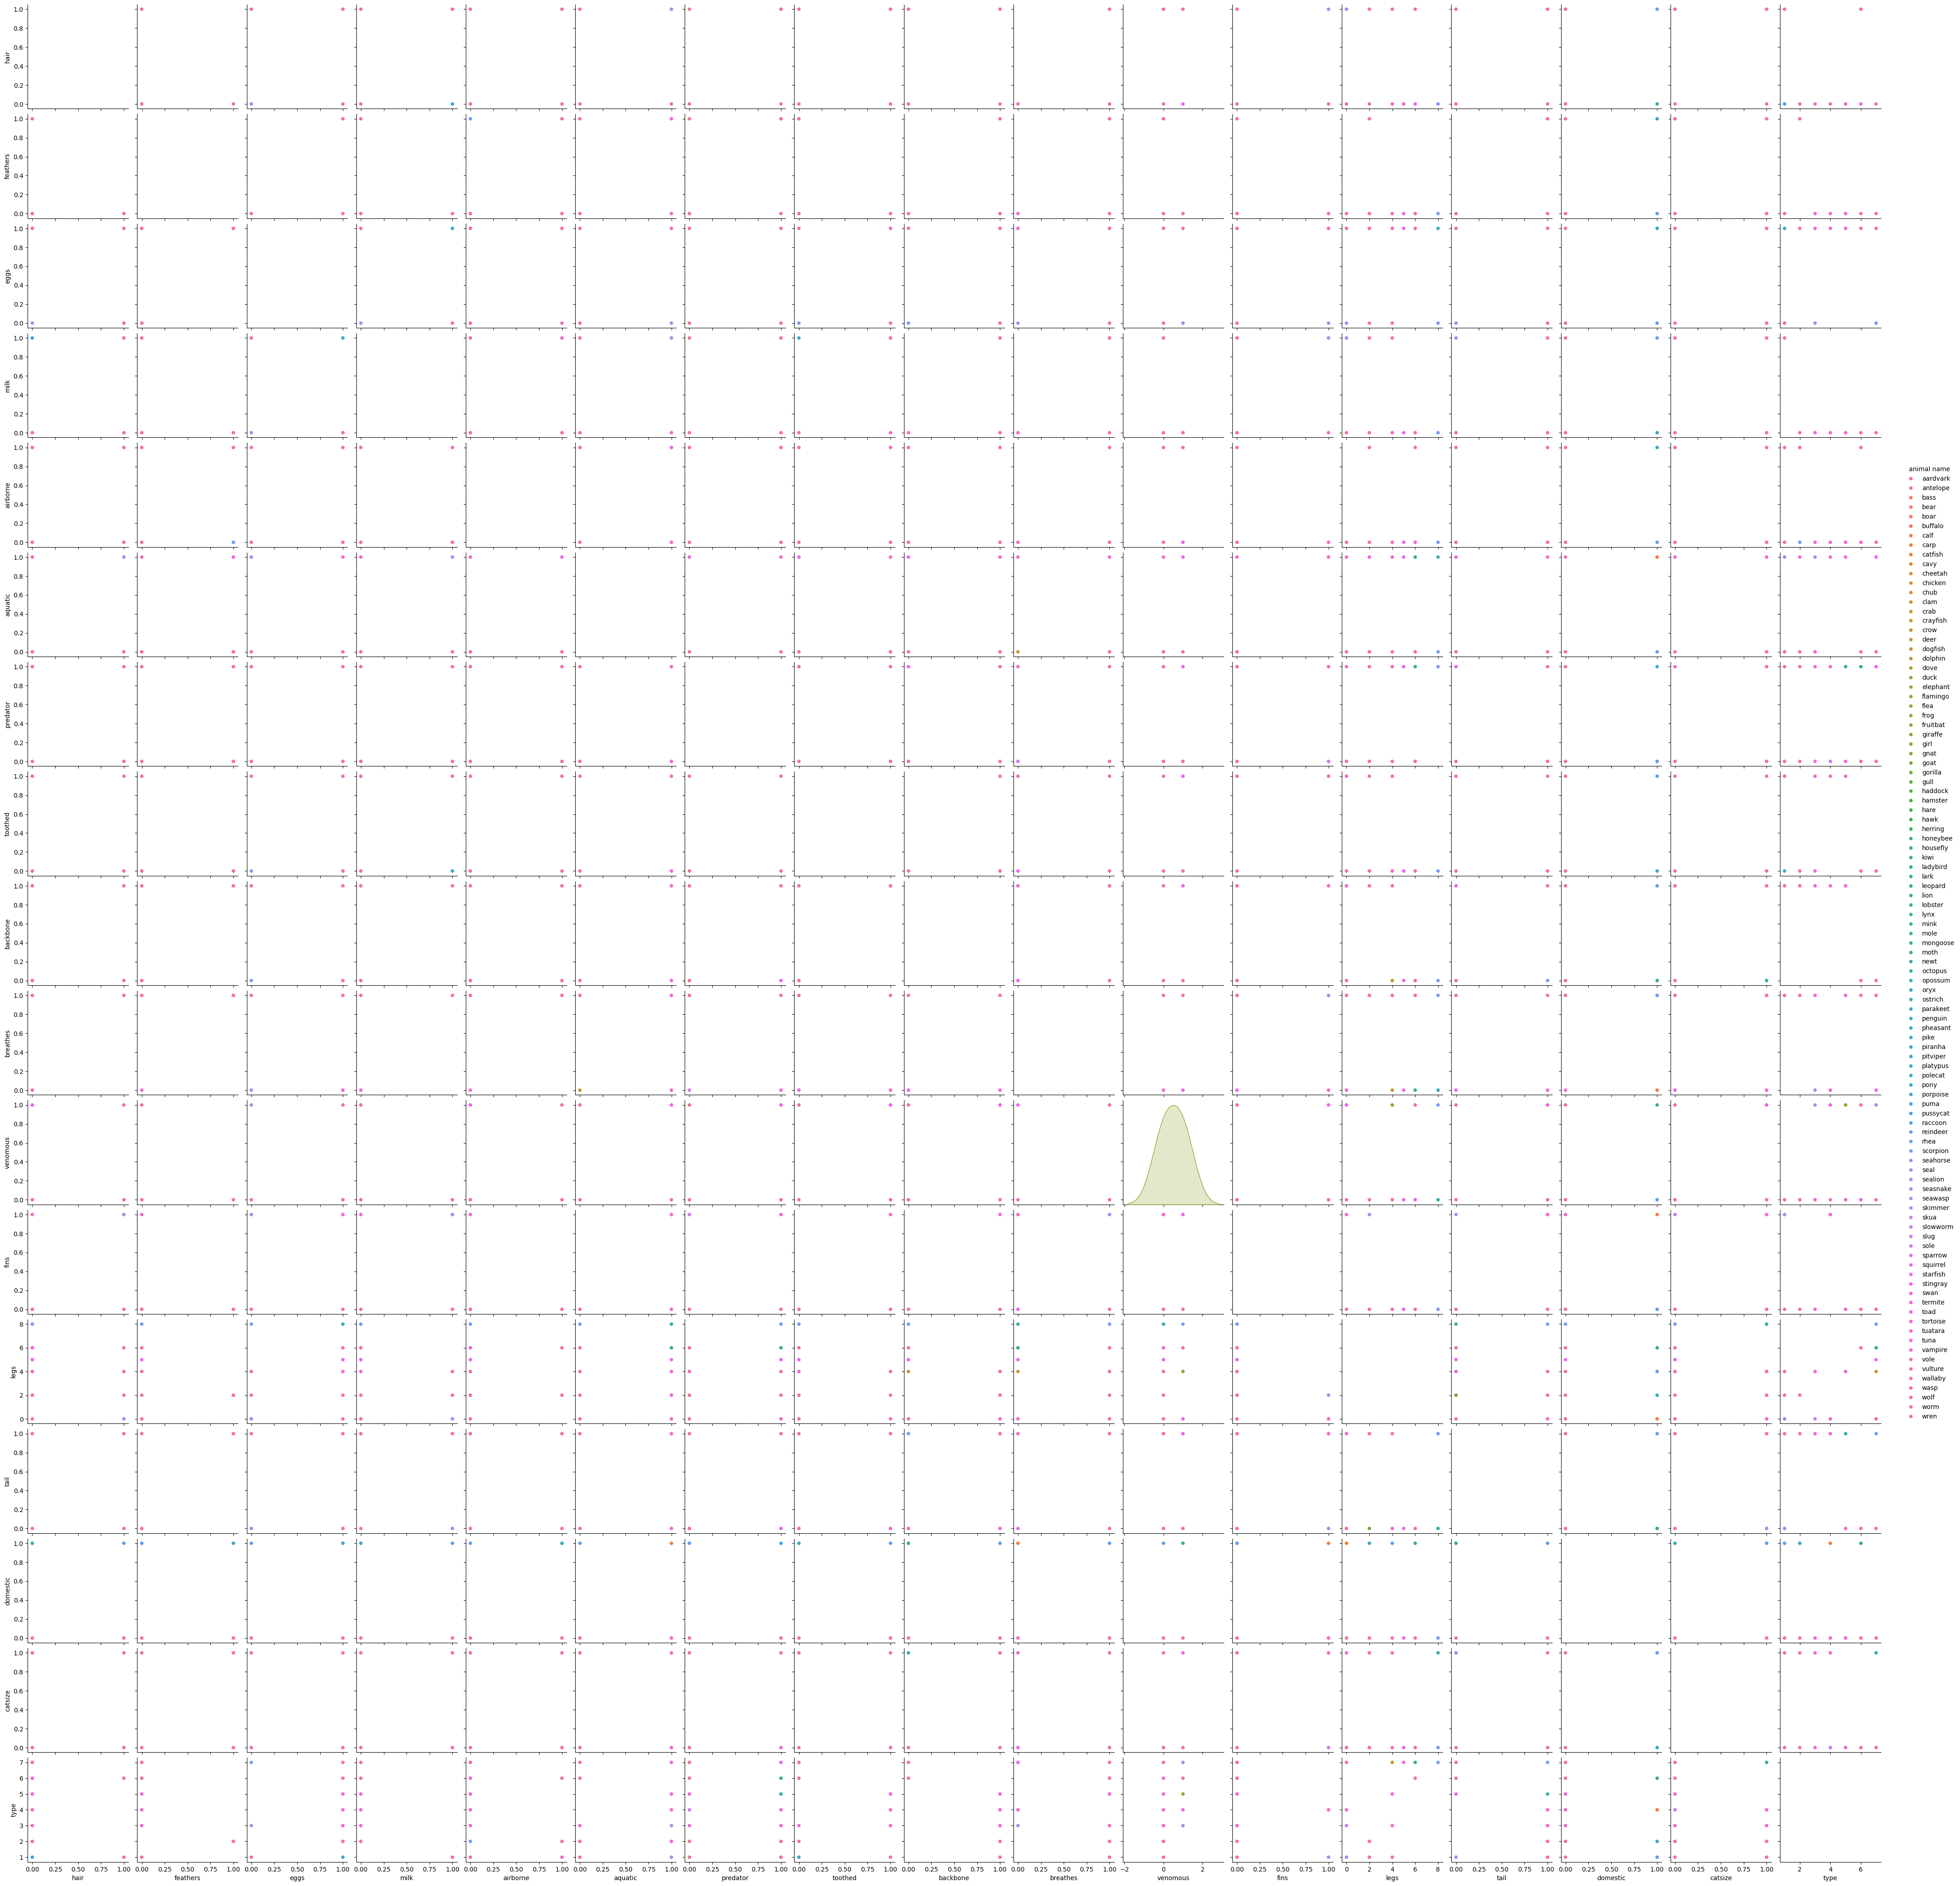

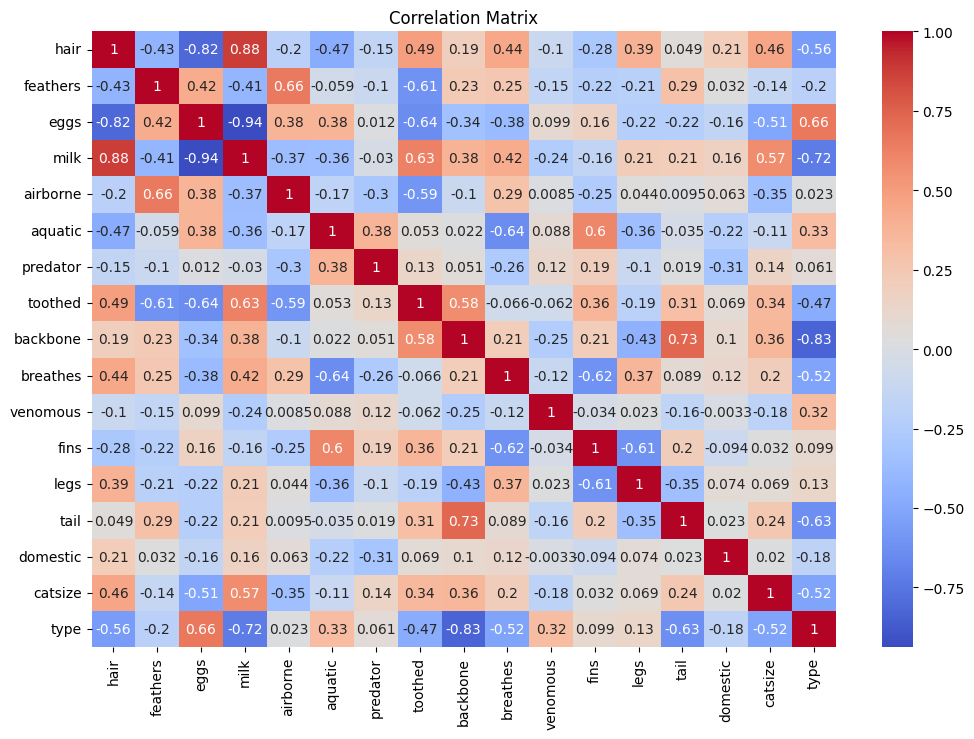

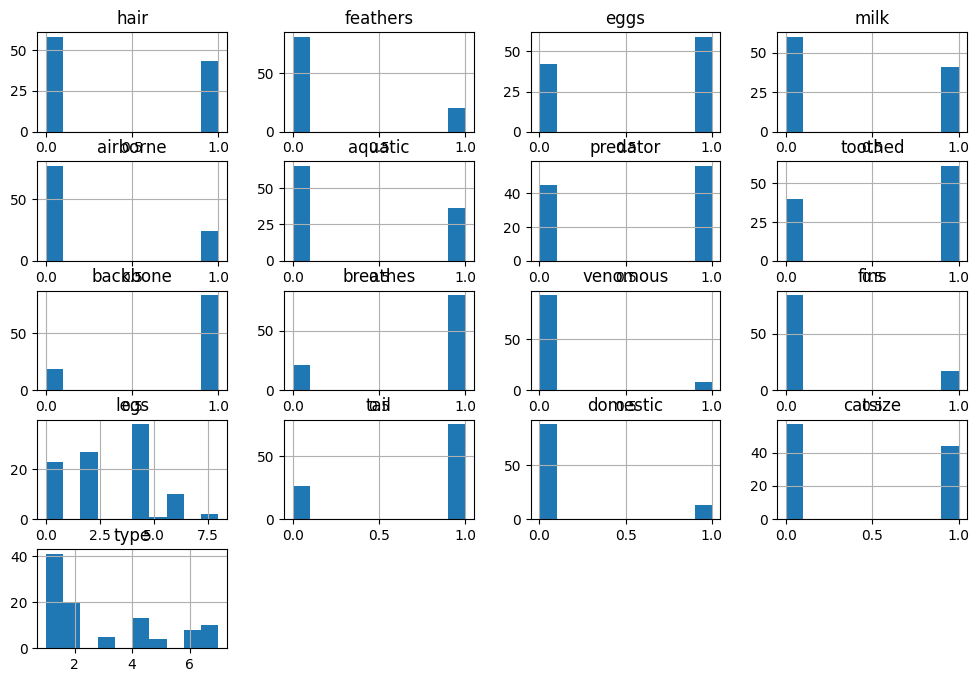

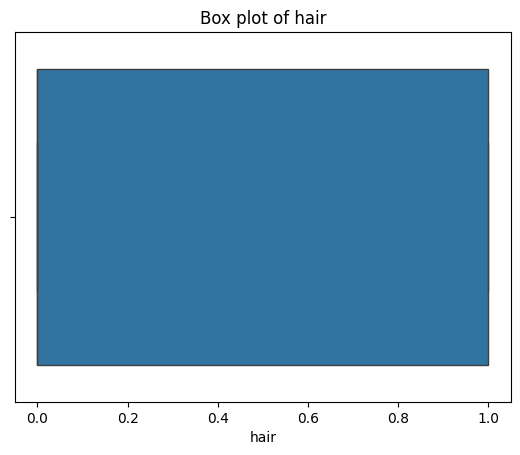

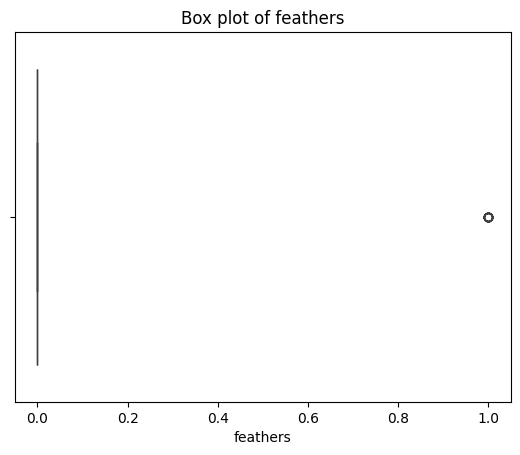

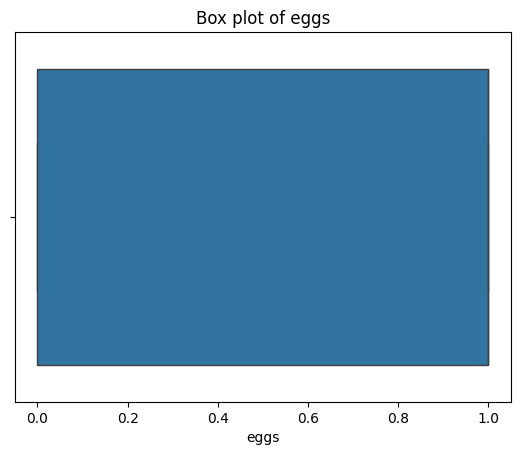

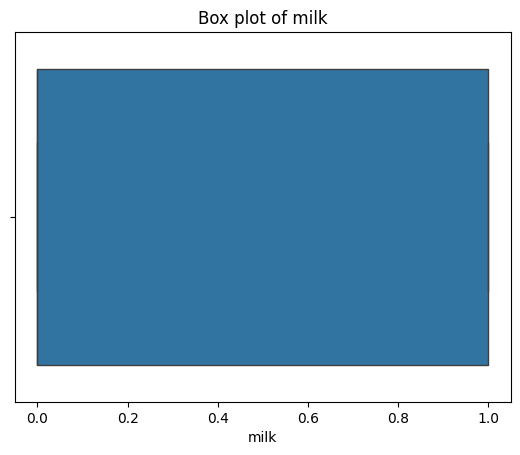

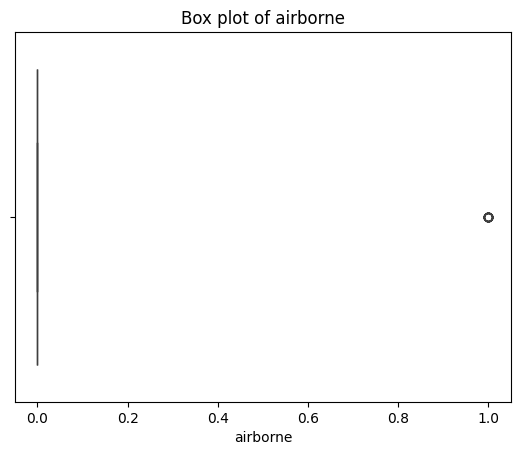

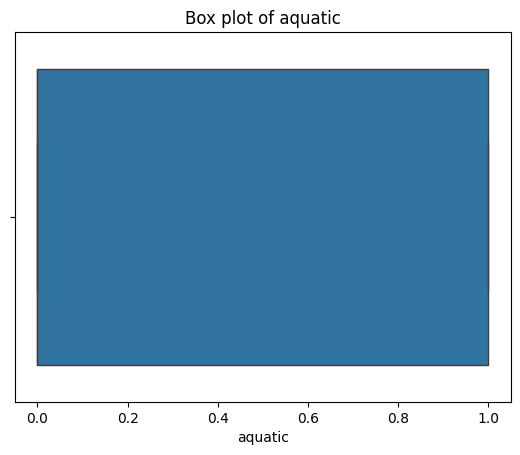

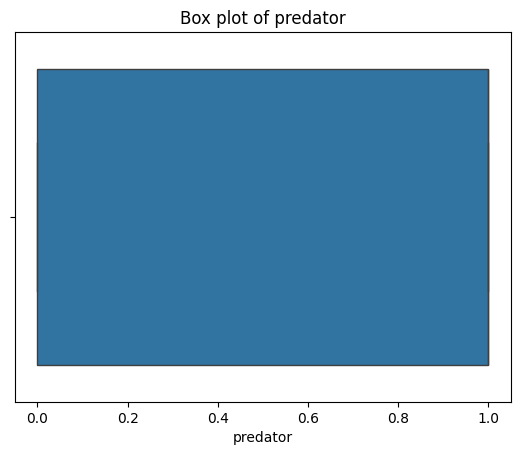

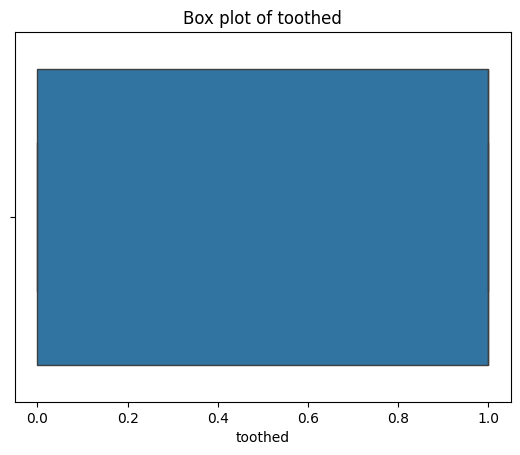

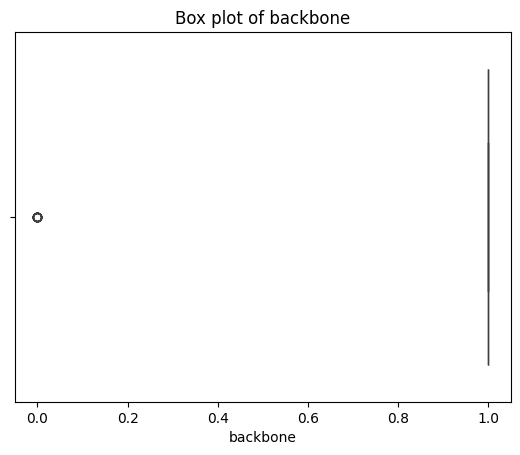

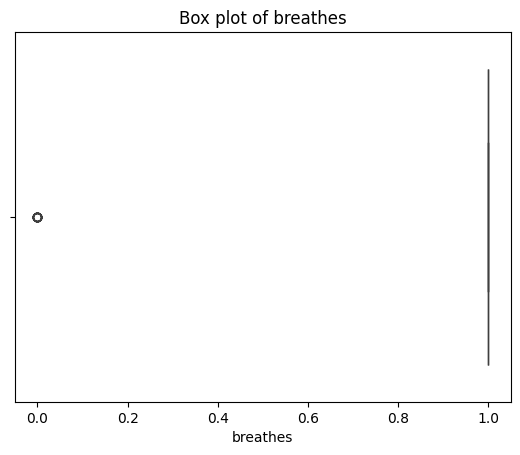

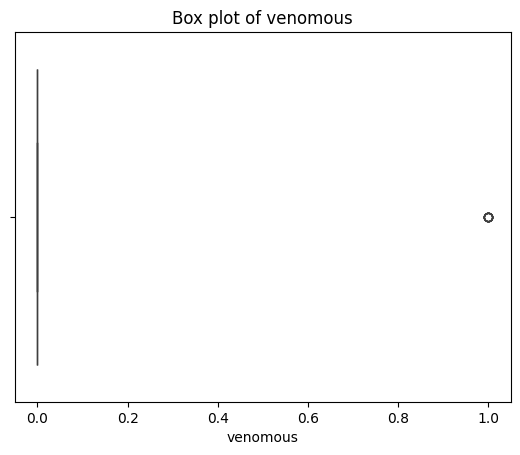

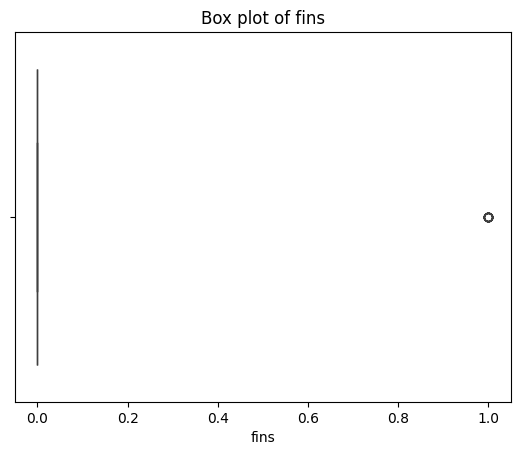

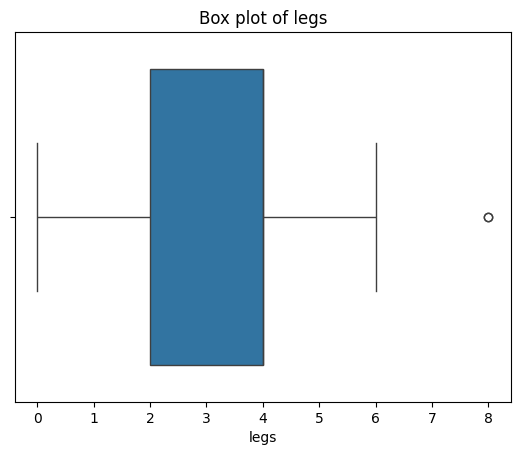

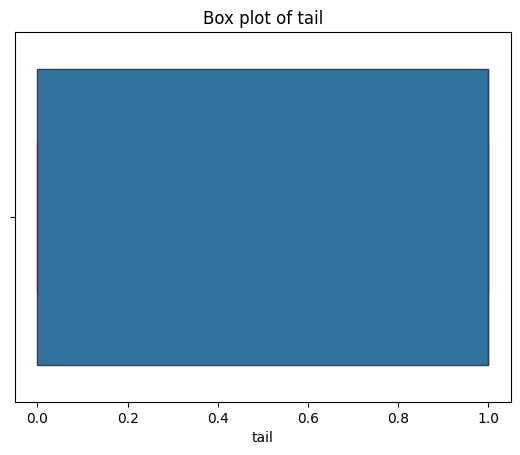

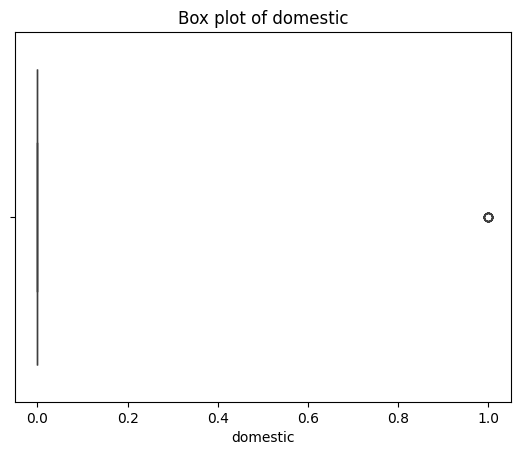

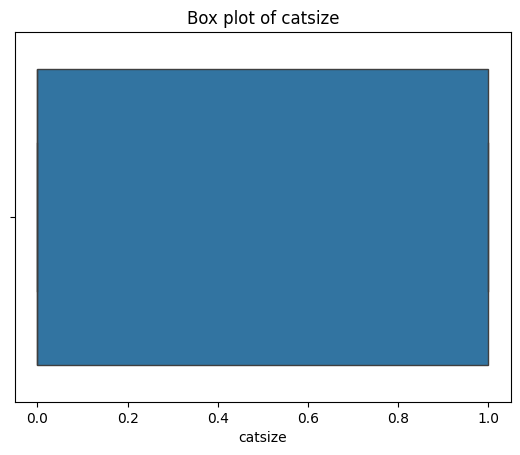

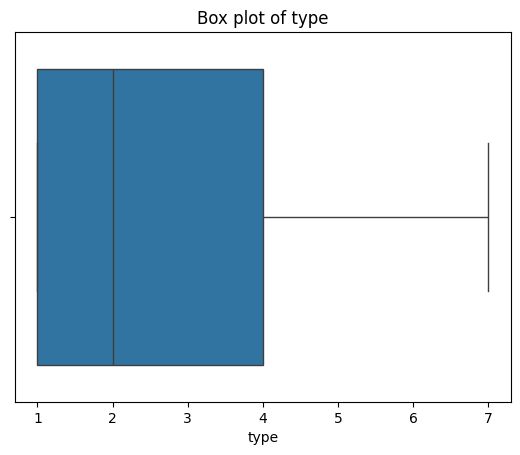

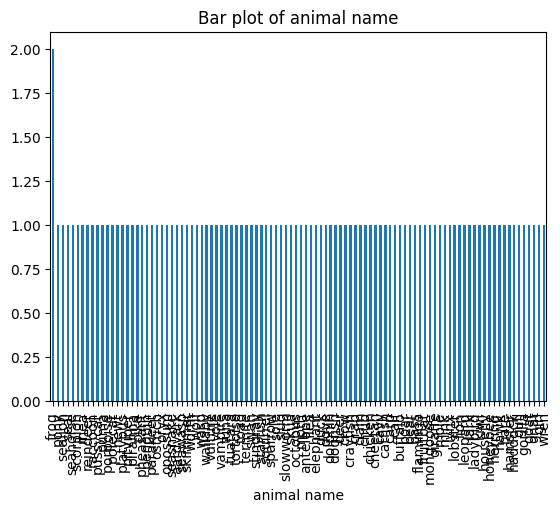

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyse the data using the visualizations

# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='animal name')
plt.show()

# Correlation matrix heatmap
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histogram of numerical features
df.hist(figsize=(12, 8))
plt.show()

# Box plots to identify outliers
for column in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title(f'Box plot of {column}')
  plt.show()

# Bar plots for categorical features
for column in df.select_dtypes(include=['object']).columns:
  plt.figure()
  df[column].value_counts().plot(kind='bar')
  plt.title(f'Bar plot of {column}')
  plt.show()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


<ipython-input-5-b63acc10356c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['milk'].fillna(df['milk'].mean(), inplace=True)


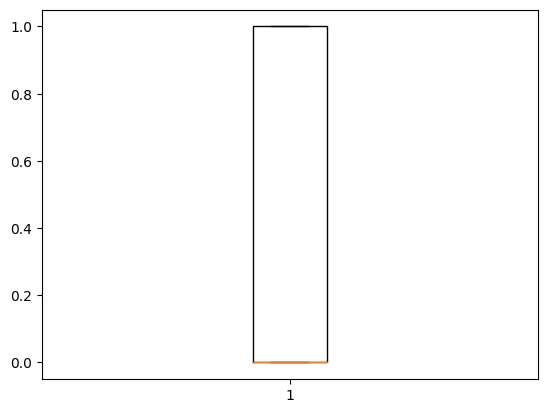

In [5]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - Example: Fill with mean
df['milk'].fillna(df['milk'].mean(), inplace=True)

# Identify outliers using boxplots or IQR
# Example for 'milk':
import matplotlib.pyplot as plt
plt.boxplot(df['milk'])
plt.show()

# Handle outliers (if any) - Example: Replace with median or remove
Q1 = df['milk'].quantile(0.25)
Q3 = df['milk'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['milk'] = df['milk'].clip(lower_bound, upper_bound)

In [11]:
#Split the dataset into training and testing sets (80% training, 20% testing)

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'animal_name' is the column to predict
X = df.drop('animal name', axis=1)
y = df['animal name']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

,animal name
84,squirrel
55,oryx
66,porpoise
67,puma
45,lion
39,honeybee
22,elephant
44,leopard
10,cheetah
0,aardvark


In [12]:
#  Implement the K-Nearest
#  algorithm using a machine learning library like scikit-learn On training dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a KNN classifier with k=5 (you can choose a different value)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Choose an appropriate distance metric and value for K.

# We can try different distance metrics like 'euclidean', 'manhattan', 'minkowski'
# and different values of K and evaluate the model's performance to see which one gives the best results.

# Experiment with different values of K and distance metrics to optimize performance
# For example, you can try:
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean') #Try different k and distance metrics
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-25-8ec48434b627>:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=label_encoder.transform(y_test),


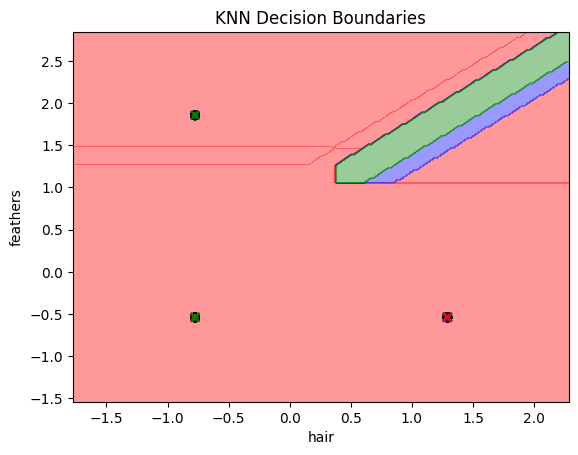

In [25]:
# Visualize the decision boundaries of the classifier

from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Import matplotlib.pyplot

# Assuming X_train and X_test have only two features for visualization
# If you have more features, you can use dimensionality reduction techniques like PCA

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['hair', 'feathers']])
X_test_scaled = scaler.transform(X_test[['hair', 'feathers']])

# Create a meshgrid for visualization
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Create a dataframe with the meshgrid points and all features
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['hair', 'feathers'])

# Instead of imputing 0, use the mean for other features
for feature in X_train.columns:
    if feature not in ['hair', 'feathers']:
        meshgrid_df[feature] = X_train[feature].mean()

# Scale all the features for prediction, not just 'hair' and 'feathers'
# Fit on the original training data with all features
scaler = StandardScaler()  # Reinitialize scaler to fit on all features
scaler.fit(X_train)        # Fit to all columns of training data
meshgrid_df_scaled = pd.DataFrame(scaler.transform(meshgrid_df), columns=meshgrid_df.columns)

# Predict using the scaled meshgrid dataframe with all features
Z = knn_classifier.predict(meshgrid_df_scaled)

# Convert string labels to numerical values using LabelEncoder if necessary
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on all unique labels from training, test, and predicted data
label_encoder.fit(np.concatenate((y_train, y_test, Z))) # Fit on combined labels

# Encode labels for plotting
Z_encoded = label_encoder.transform(Z)  # Encode string labels to numbers
Z_encoded = Z_encoded.reshape(xx.shape)     # Reshape encoded Z to match meshgrid


# Put the result into a color plot
plt.contourf(xx, yy, Z_encoded, alpha=0.4, cmap=ListedColormap(['red', 'blue', 'green']))

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=label_encoder.transform(y_train),
            cmap=ListedColormap(['red', 'blue', 'green']), edgecolor='k')

# Plot the test points
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=label_encoder.transform(y_test),
            cmap=ListedColormap(['red', 'blue', 'green']), edgecolor='k', marker='x')

plt.xlabel('hair')
plt.ylabel('feathers')
plt.title('KNN Decision Boundaries')
plt.show()


Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


In [27]:

# 1. Key Hyperparameters in KNN:
#    - **n_neighbors (k):** The number of nearest neighbors to consider when making a prediction. This is the most important hyperparameter, and it determines the model's complexity. A smaller value of k can lead to overfitting, while a larger value can lead to underfitting.
#    - **weights:** Determines how the neighbors contribute to the prediction. Options include:
#        - 'uniform': All neighbors have equal weight.
#        - 'distance': Closer neighbors have more influence on the prediction.
#    - **metric:** The distance metric used to calculate the distance between data points. Common options include:
#        - 'euclidean': The straight-line distance between two points.
#        - 'manhattan': The sum of the absolute differences between the coordinates of two points.
#        - 'minkowski': A generalization of Euclidean and Manhattan distances.
#    - **algorithm:** The algorithm used to compute the nearest neighbors. Options include:
#        - 'auto': The algorithm is automatically chosen based on the values of the other hyperparameters.
#        - 'ball_tree': Uses a ball tree data structure to efficiently compute nearest neighbors.
#        - 'kd_tree': Uses a kd-tree data structure to efficiently compute nearest neighbors.
#        - 'brute': Uses a brute-force algorithm to compute nearest neighbors.
#    - **leaf_size:** The size of the leaves in the tree data structures used by the ball tree and kd-tree algorithms.
#    - **p:** The power parameter for the Minkowski metric.

In [26]:

# 2. What distance metrics can be used in KNN?
#    - **Euclidean Distance:** The most common distance metric, it calculates the straight-line distance between two points in a Euclidean space. It's suitable for continuous data and when the features have similar scales.
#    - **Manhattan Distance:** It calculates the sum of the absolute differences between the coordinates of two points. It's less sensitive to outliers compared to Euclidean distance and suitable for features with different scales.
#    - **Minkowski Distance:** A generalization of Euclidean and Manhattan distances, it can be adjusted using the 'p' parameter. When 'p=2', it becomes Euclidean distance, and when 'p=1', it becomes Manhattan distance.
#    - **Cosine Similarity:** Measures the angle between two vectors, useful for text data or when the magnitude of the vectors is less important than the direction. It's typically used for calculating similarity rather than distance.
#    - **Hamming Distance:** It calculates the number of positions at which the corresponding elements of two vectors are different. It's primarily used for binary data or categorical features.


# Note: The choice of hyperparameters and distance metric depends on the specific problem and the nature of the data.